<h1> <b>Malaria Detection</b> </h1>

In [1]:
import os
import random
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model
# Imports for Data Visualization
import matplotlib.pyplot as plt
from matplotlib.image import imread
import seaborn as sns

In [2]:
# Directory for Parasitized cell images
parasitize_images_dir = '../cell_images/Parasitized'

# Directory for Uninfected cell images
uninfected_images_dir = '../cell_images/Uninfected'

In [3]:
# Directory for Parasitized images
parasitic = os.listdir(parasitize_images_dir)

# Directory for Uninfected images
uninfected = os.listdir(uninfected_images_dir)

In [4]:
len(parasitic)  #total images of Parasitized images

13744

In [5]:
len(uninfected)

13780

<h1> <b>DATA VISUALIZATION</b> </h1>

<h2> <b> PARASITIZED IMAGES</b> </h2>

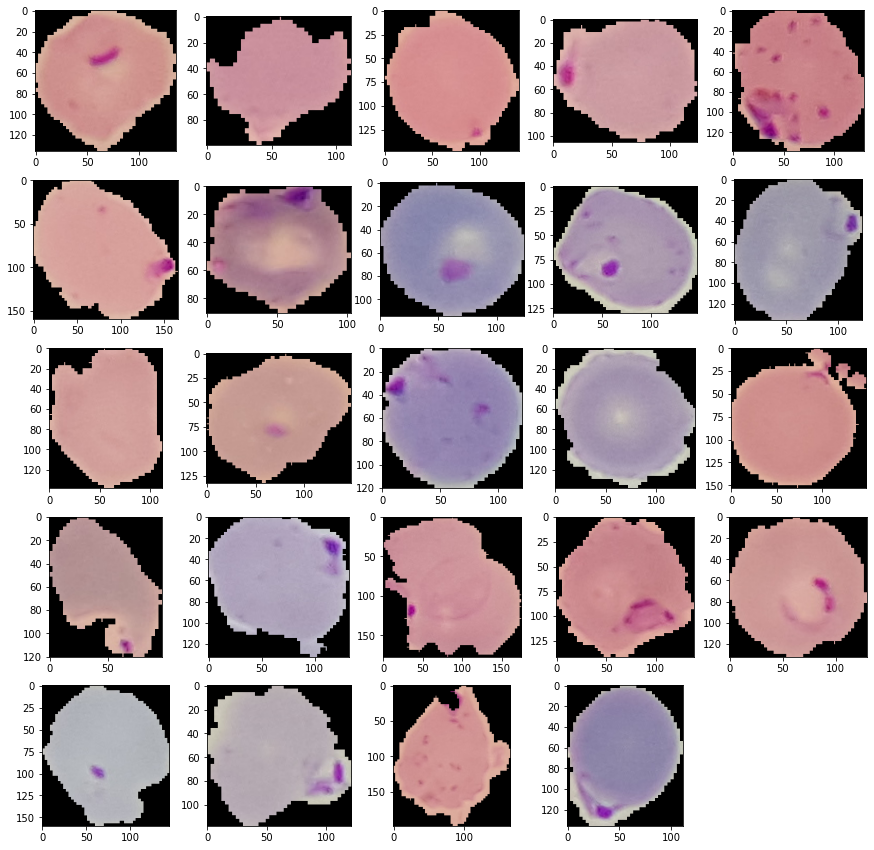

In [6]:
# lets see a variety of parasitized cells
filenames = random.sample(os.listdir('../cell_images/Parasitized') , 25)

# here we will see 25 images of Parasitized cell images
plt.figure(figsize=(15, 15))  # figure size
for i in range(1, len(filenames)):
    row = i
    image = imread('../cell_images/Parasitized/' + filenames[i])
    plt.subplot(5, 5, row)
    plt.imshow(image)
plt.show()

<h2><b>UNINFECTED IMAGES</b></h2>





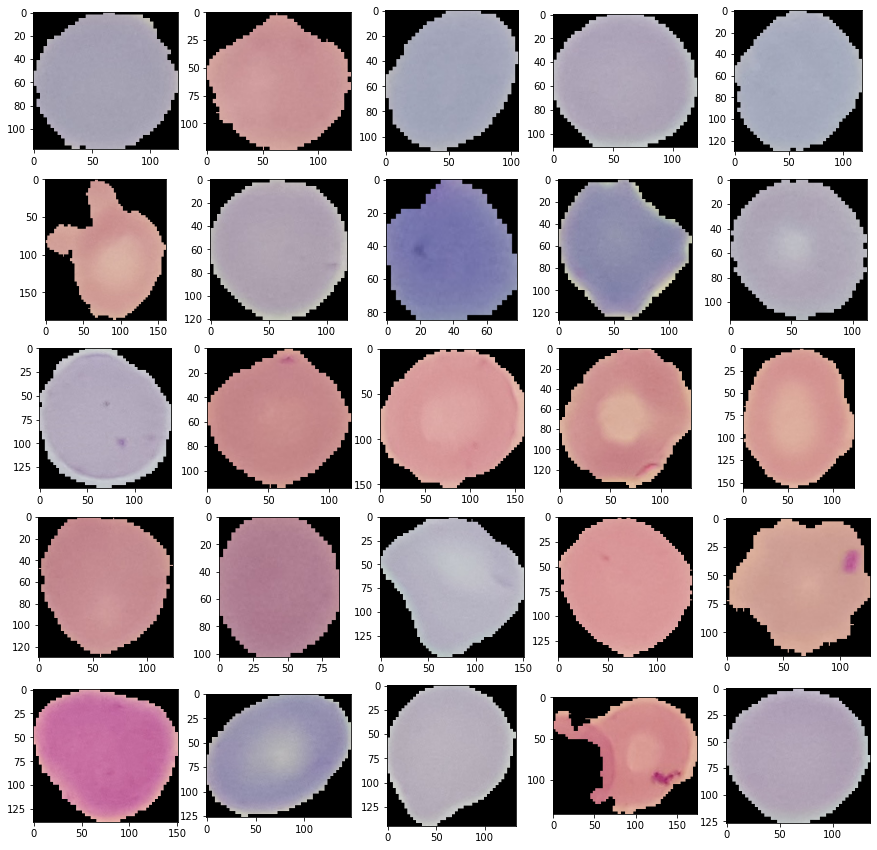

In [7]:
# lets see a variety of uninfected cells
filenames_ = random.sample(os.listdir('../cell_images/Uninfected'), 26)

# here we will see 25 images of Uninfected cell images
plt.figure(figsize=(15, 15))
for i in range(1, len(filenames_)):
    row = i
    image = imread('../cell_images/Uninfected' + '/' + filenames_[i])
    plt.subplot(5, 5, row)
    plt.imshow(image)
plt.show()


<h1> <b>DATA PREPROCESSING</b> </h1>

<p> <b>DATA AUGMENTATION</b> <br>
We are doing data augmentation and splitting the data in training and validation set.</p>

*   Setting split equal to 0.05%
*   Shape of image is (64,64,3)




In [8]:
data = ImageDataGenerator(rescale=1/255.0,rotation_range=0.4,width_shift_range=0.3,height_shift_range=0.3,
                          shear_range=0.2,zoom_range=0.4,horizontal_flip=True,validation_split=0.05)

train = data.flow_from_directory(
    "../cell_images",
    target_size=(64,64),
    class_mode = "binary",
    subset = "training",
    batch_size=32,
    shuffle=True
    
)

test = data.flow_from_directory(
    "../cell_images",
    target_size=(64,64),
    class_mode = "binary",
    subset = "validation",
    shuffle = True
    
)

Found 26147 images belonging to 2 classes.
Found 1375 images belonging to 2 classes.


<h1> <b>BUILDING MODEL USING VGG16 </b> </h1>

<h3> <b>ABOUT VGG16</b> </h3>

*   VGG16 is a convolution neural net(CNN) architecture which was used to win ILSVR(Imagenet) competition in 2014.
*   By default, it loads weights pre-trained on ImageNet.
*   The default input size for this model is 224x224.



In [9]:
#using imagenet wights and setting the shape as (64,64,3) as our image is of 64,64 and has 3 channels
model = VGG16( include_top=False, weights ="imagenet", input_shape=(64,64,3))  
model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 64, 64, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 64, 64, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 32, 32, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 32, 32, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 32, 32, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 16, 16, 128)       0     

In [10]:
#Printing the names of all the layers present in the model and setting trainable as False

for i in range(len(model.layers)):
    print(i,model.layers[i])
    model.layers[i].trainable=False

0 <keras.engine.input_layer.InputLayer object at 0x000001E6998D6C70>
1 <keras.layers.convolutional.Conv2D object at 0x000001E6C7BAF910>
2 <keras.layers.convolutional.Conv2D object at 0x000001E6C79A2130>
3 <keras.layers.pooling.MaxPooling2D object at 0x000001E6C79A20A0>
4 <keras.layers.convolutional.Conv2D object at 0x000001E6C7AB81F0>
5 <keras.layers.convolutional.Conv2D object at 0x000001E6C7AB8C70>
6 <keras.layers.pooling.MaxPooling2D object at 0x000001E6C79A2D00>
7 <keras.layers.convolutional.Conv2D object at 0x000001E6C7A5F310>
8 <keras.layers.convolutional.Conv2D object at 0x000001E6C7A68A00>
9 <keras.layers.convolutional.Conv2D object at 0x000001E6C7A5F160>
10 <keras.layers.pooling.MaxPooling2D object at 0x000001E6C7A5F9D0>
11 <keras.layers.convolutional.Conv2D object at 0x000001E6C7A663A0>
12 <keras.layers.convolutional.Conv2D object at 0x000001E6C7A48BE0>
13 <keras.layers.convolutional.Conv2D object at 0x000001E6C7A72490>
14 <keras.layers.pooling.MaxPooling2D object at 0x000001

In [11]:
# Adding the custom layers to the model

l = GlobalAveragePooling2D()(model.output)
l2 = Dropout(0.2)(l)
l3 = Dense(128, activation="relu")(l2)
l4 = Dropout(0.2)(l3)
l5 = Dense(1,activation="sigmoid")(l4)

#creating the new model by adding the VGG model's input as Input of the new model and l5 layer of our custom model as Output.
new_model = Model(inputs= model.input, outputs= l5)


In [12]:
# New Model
new_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 64, 64, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 64, 64, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 32, 32, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 32, 32, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 32, 32, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 16, 16, 128)       0     

<h2> <b> Compiling the new model </b> </h2>

In [13]:
# Using Adam as the optimizer and loss as binary cross entropy as there are only 2 classes
adam = Adam(learning_rate=0.001)
new_model.compile(optimizer=adam,loss="binary_crossentropy",metrics=['accuracy'])

<h2> <b> Training the new model </b> </h2>

In [14]:
his = new_model.fit_generator(train,epochs=10,validation_data=test)

Epoch 1/10


<ipython-input-14-1682f3846180>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  his = new_model.fit_generator(train,epochs=10,validation_data=test)


818/818 [==============================] - 228s 278ms/step - loss: 0.4735 - accuracy: 0.7711 - val_loss: 0.3956 - val_accuracy: 0.8182
Epoch 2/10
818/818 [==============================] - 219s 268ms/step - loss: 0.4255 - accuracy: 0.8053 - val_loss: 0.3699 - val_accuracy: 0.8378
Epoch 3/10
818/818 [==============================] - 221s 270ms/step - loss: 0.4154 - accuracy: 0.8103 - val_loss: 0.4006 - val_accuracy: 0.8305
Epoch 4/10
818/818 [==============================] - 220s 269ms/step - loss: 0.4117 - accuracy: 0.8153 - val_loss: 0.3550 - val_accuracy: 0.8473
Epoch 5/10
818/818 [==============================] - 221s 270ms/step - loss: 0.4128 - accuracy: 0.8121 - val_loss: 0.3517 - val_accuracy: 0.8465
Epoch 6/10
818/818 [==============================] - 219s 267ms/step - loss: 0.4059 - accuracy: 0.8168 - val_loss: 0.3947 - val_accuracy: 0.8320
Epoch 7/10
818/818 [==============================] - 218s 266ms/step - loss: 0.4006 - accuracy: 0.8186 - val_loss: 0.3670 - val_accura

<h2> <b> Plotting the Accuracy, Validation Accuracy, Loss and Validation Loss </b> </h2>

[]

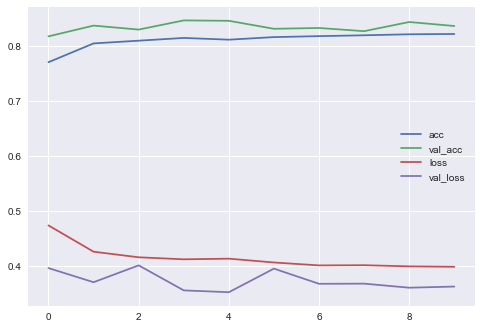

In [15]:
plt.style.use("seaborn")
plt.plot(his.history['accuracy'],label="acc")
plt.plot(his.history['val_accuracy'],label="val_acc")
plt.plot(his.history['loss'],label="loss")
plt.plot(his.history['val_loss'],label="val_loss")
plt.legend()
plt.plot()

<h2> <b> Testing the model </b> </h2>

In [16]:
#testing on train set
new_model.evaluate(train)  

818/818 [==============================] - 1005s 1s/step - loss: 0.3637 - accuracy: 0.8415


[0.36366283893585205, 0.8414732217788696]

In [17]:
#testing  on test set
print("TESTING ACCURACY :", new_model.evaluate(test)[1])  

43/43 [==============================] - 13s 290ms/step - loss: 0.3602 - accuracy: 0.8509
TESTING ACCURACY : 0.8509091138839722


In [27]:
# save it as a h5 file


from tensorflow.keras.models import load_model

new_model.save('model_vgg16.h5')

In [70]:
y_pred = new_model.predict(test)

In [71]:
y_pred

array([[0.02535528],
       [0.97179663],
       [0.16063306],
       ...,
       [0.58284307],
       [0.8895246 ],
       [0.03486705]], dtype=float32)

array([0.52692056], dtype=float32)

In [72]:
import numpy as np
y_pred = (y_pred*100)
y_pred = y_pred.tolist()


In [75]:
type(y_pred)

list

In [76]:
y_pred = [ item for elem in y_pred for item in elem]

In [78]:
y_pred = [round(num) for num in y_pred]

In [79]:
y_pred

[3,
 97,
 16,
 48,
 24,
 66,
 0,
 0,
 36,
 67,
 38,
 2,
 0,
 50,
 83,
 5,
 7,
 73,
 81,
 16,
 5,
 0,
 75,
 91,
 1,
 52,
 1,
 72,
 55,
 0,
 70,
 0,
 58,
 0,
 79,
 7,
 63,
 78,
 96,
 83,
 90,
 92,
 3,
 7,
 85,
 51,
 12,
 45,
 75,
 0,
 9,
 87,
 16,
 65,
 76,
 51,
 10,
 52,
 9,
 83,
 80,
 93,
 80,
 69,
 65,
 71,
 93,
 96,
 67,
 82,
 96,
 92,
 71,
 75,
 85,
 94,
 55,
 57,
 68,
 89,
 93,
 37,
 66,
 0,
 78,
 73,
 51,
 86,
 71,
 95,
 81,
 20,
 50,
 71,
 5,
 40,
 67,
 85,
 93,
 87,
 3,
 78,
 79,
 70,
 1,
 5,
 2,
 75,
 0,
 84,
 6,
 1,
 33,
 81,
 70,
 96,
 50,
 83,
 78,
 87,
 17,
 4,
 8,
 14,
 59,
 89,
 82,
 78,
 71,
 18,
 0,
 26,
 73,
 75,
 4,
 70,
 87,
 0,
 70,
 58,
 67,
 77,
 96,
 0,
 68,
 0,
 42,
 93,
 83,
 76,
 20,
 72,
 94,
 90,
 58,
 70,
 0,
 0,
 34,
 23,
 69,
 0,
 78,
 95,
 74,
 93,
 81,
 75,
 0,
 85,
 35,
 0,
 0,
 0,
 87,
 93,
 92,
 87,
 71,
 65,
 74,
 46,
 59,
 53,
 0,
 6,
 0,
 77,
 39,
 25,
 0,
 2,
 42,
 95,
 0,
 85,
 2,
 81,
 50,
 28,
 44,
 37,
 19,
 91,
 66,
 74,
 74,
 1,
 64,
 79,
 

In [92]:
x=y_pred[1]

In [93]:
if (x in range(50,100)):
    
    x="The Person is not Infected With Malaria"
    print(x)
else:
    x="The Person is Infected With Malaria"
    print(x)

The Person is not Infected With Malaria
